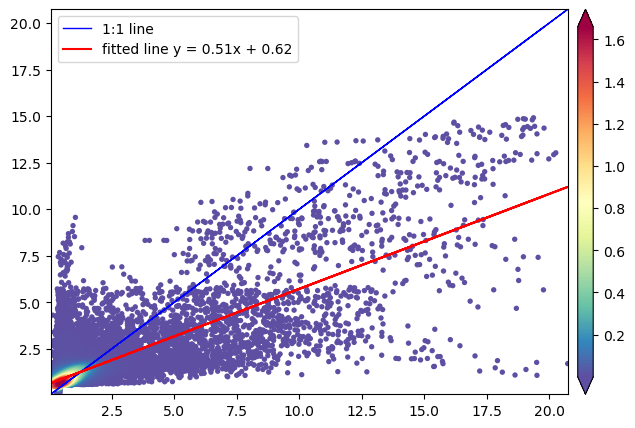

In [9]:
import matplotlib.pyplot as plt 
from scipy.stats import gaussian_kde
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np
import pandas as pd

# Read data
df = pd.read_csv(r'../phase_0_predictions.csv')



x = df['fluors']
y = df['y_pred']

# linear regression of y on x (scipy)

import scipy.stats as stats
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

# plot linear regression




xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]
fig, ax = plt.subplots(figsize=(7,5),dpi=100)
maxNum = max(x)
minNum = min(x)
ax.plot(x, x, color='blue', linewidth=1,label = '1:1 line')#reference line
ax.plot(x, intercept + slope*x, 'r', label='fitted line y = {:.2f}x + {:.2f}'.format(slope,intercept))
ax.legend()
plt.xlim(minNum, maxNum)
plt.ylim(minNum, maxNum)
#Least squares fit

xcord = x
ycord = y

m = ((xcord*ycord).mean() - xcord.mean()* ycord.mean())/(pow(xcord,2).mean()-pow(xcord.mean(),2))

c = ycord.mean() - m*xcord.mean()
# Plot
y1=m*x+c  
scatter=ax.scatter(x,y,marker='o',c=z,edgecolors='none',s=15,label='LST',cmap='Spectral_r')
divider=make_axes_locatable(ax)
cax = divider.append_axes("right",size="3%",pad=0.1)
cbar = fig.colorbar(scatter, cax=cax, label='frequency')
cbar = fig.colorbar(scatter,cax=cax,extend='both',aspect=30,fraction=.03,pad=0.01)




# plt.savefig('plot82.1.png',dpi=800,bbox_inches='tight',pad_inches=0)
plt.show()